# Data Validation and Bias Testing with Python and AI Fairness 360

### Purpose:
For this exercise, we will explore how to detect and quantify biases in a dataset using Python and visualization tools, We'll also calculate fairness metrics with AI Fairness 360 to identify potentional imbalances.

### Tools Used:
- Pandas: Python library for data manipulation and analysis
- Seaborn/Matplotlib: Libraries used for creating visualizations that help identify patterns and imbalances in data
- AI Fairness 360: A toolkit developed by IBM to measure and mitigate bias in AI models, providing fairness metrics and visualizations.

## Step 0: Setup
### Dataset Overview
The German Credit Dataset contains information about loan applicants, including demographic and financial attributes:
1. Gender:
 - `1`: Male
 - `0`: Female
2. Age Group:
 - `1`: Older (age ≥ 25)
 - `0`: Younger (age < 25)
3. Credit Risk (Target Variable):
 - `1`: Good Credit Risk
 - `2`: Bad Credit Risk

### Code: Setting Up
Below is the code to install required libraries and import them.

In [ ]:
# Install AI Fairness 360
!pip install aif360

# Download the German Credit Dataset
!mkdir -p /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german
!wget -q -P /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget -q -P /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.7 MB/s eta 0:00:00


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


## Step 1: Loading and Previewing the Dataset
Let's load the dataset and take a quick look at the data to understand its structure and contents. Below is the python code to load the dataset from a public source and preview its contents.

In [ ]:
# Load the dataset
dataset = GermanDataset()
df = pd.DataFrame(dataset.features, columns=dataset.feature_names)
df['credit_risk'] = dataset.labels

# Display the first few rows of the dataset
df.head()

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,sex,status=A11,status=A12,...,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202,credit_risk
0,6.0,1169.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,48.0,5951.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0
2,12.0,2096.0,2.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,42.0,7882.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,24.0,4870.0,3.0,4.0,1.0,2.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0


### Dataset Description
The dataset contains the following columns:
1. **age**: The age of the individual in years
2. **sex**: Gender of the applicant
3. **credit_amount**: Amount of credit requested
4. **residence_since**: Duration of residence in years
5. **people_liable_for**: Number of people the applicant is liable for
6. **credit_risk**: Target variable indicating creditworthiness

We will focus on sex and age for analyzing potential biases

## Step 2: Analyzing Sensitive Attributes

Now, let's explore the senstive attributes like **sex** and **age**. We'll analyze their distributions to identify any imbalances that may exist in the dataset. Imbalances in sensitive attributes can lead to biased outcomes when training AI models, making it crucial to detect and address these issues early in the development process. The following code calculates and displays the distribution of valeues for the `sex` and `age` attributes.

In [ ]:
print("Gender Distribution:")
print(df['sex'].replace({1: 'Male', 0: 'Female'}).value_counts())

print("\nAge Distribution:")
print(df['age'].replace({1: 'Older', 0: 'Younger'}).value_counts())

Gender Distribution:
sex
Male      690
Female    310
Name: count, dtype: int64

Race Distribution:
age
Older      810
Younger    190
Name: count, dtype: int64


### Task
1. Observe the output of the distributions for `sex` and `age`.
2. Answer the following questions:
- Does one gender dominate the dataset? If so, how might this affect this affect predictions?
- Are there age groups with very few records compared to others? What challenges might this pose for model's fairness?

## Step 3: Visualizing Distributions
Next, we'll use Seaborn to create count plots that illustrate how income distribution varies across gender and age

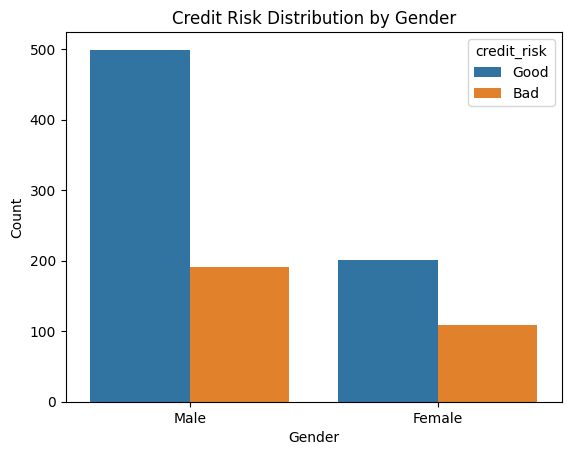

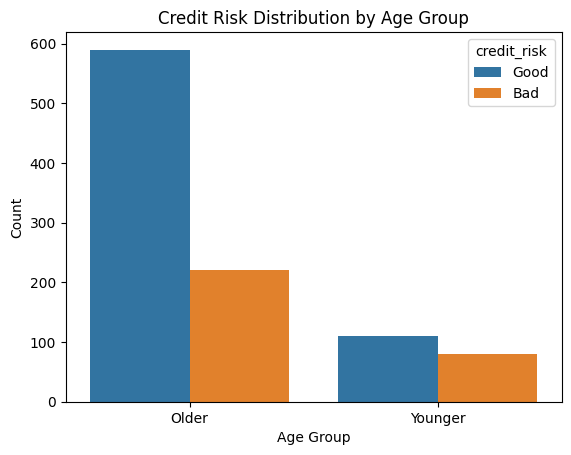

In [ ]:
# Visualizing income distribution by gender
sns.countplot(data=df.replace({'sex': {1: 'Male', 0: 'Female'}, 'credit_risk': {1: 'Good', 2: 'Bad'}}), x='sex', hue='credit_risk')
plt.title("Credit Risk Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Visualizing income distribution by age
sns.countplot(data=df.replace({'age': {1: 'Older', 0: 'Younger'}, 'credit_risk': {1: 'Good', 2: 'Bad'}}), x='age', hue='credit_risk')
plt.title("Credit Risk Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

### Task
1. Are there noticable differences in credit risk distribution between genders or age groups?
2. What implications could these differences have for fairness in AI Models?


## Explanation of Fairness Metrics

### 1. Disparate Impact
- **What is measures**: The ratio of favorable outcomes between unprivileged and privileged groups.
- **How to interpret it**:
 - A value close to 1: Outcomes are evenly distributed (little to no bias)
 - A value below 0.8: Indicates potential bias against the unprivileged group

### 2. Statistical Parity Difference
- **What it measures**: The difference in favorable outcomes between unprivileged and privileged groups
- **How to interpret it**:
 - A value close to 0: Outcomess are similar (little to no bias)
 - Positive values: Indicates the privileged group has a higher chance of receiving the positive outcome than the unprivilged group
 - Negative values: Indicates the unprivileged group has a higher chance of receiving the positive outcome than the privilged group

## Step 3: Using AI Fairness 360 for Fairness Metrics
Next, we'll calculate fairness metrics like **Disparate Impact** and **Statistical Parity Difference** using the AI Fairness 360 library. These metrics help us quantify the fairness of our dataset by comparing outcomes between privileged and unprivileged groups.

In [ ]:
# Convert the dataset for AI Fairness 360
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

binary_dataset = dataset

# Calculate fairness metrics
metric = BinaryLabelDatasetMetric(
    binary_dataset,
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups
)

print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())

Disparate Impact: 0.8965673282047968
Statistical Parity Difference: -0.07480130902290782


## Task
1. What can you infer about the fairness of the dataset based on the **Disparate Impact** and **Statistical Parity Difference** values?

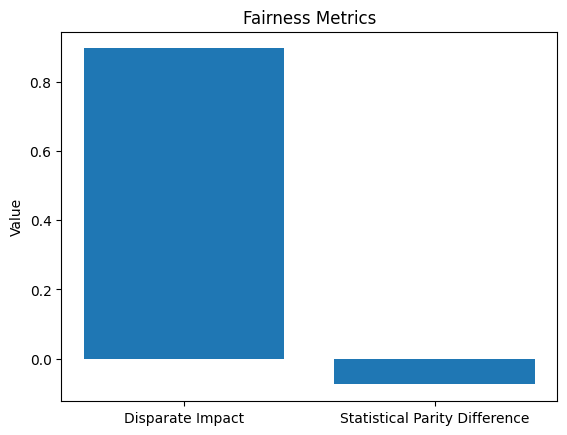

In [ ]:
metrics = {
    'Disparate Impact': metric.disparate_impact(),
    'Statistical Parity Difference': metric.statistical_parity_difference()
}

plt.bar(metrics.keys(), metrics.values())
plt.title('Fairness Metrics')
plt.ylabel('Value')
plt.show()